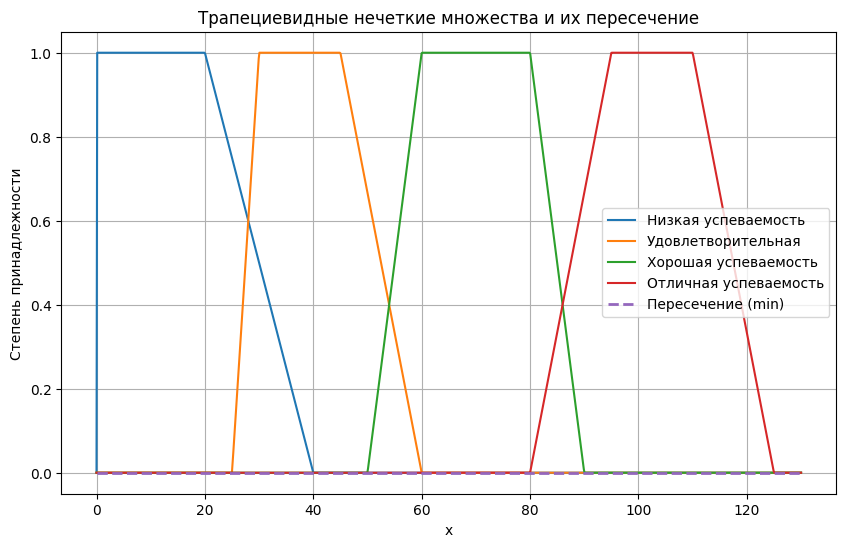


Результаты для чётких объектов:
x	Низкая успеваемость	Удовлетворительная	Хорошая успеваемость	Отличная успеваемость	Пересечение
5	1.0	0.0	0.0	0.0	0.0
30	0.5	1.0	0.0	0.0	0.0
50	0.0	0.6667	0.0	0.0	0.0
70	0.0	0.0	1.0	0.0	0.0
95	0.0	0.0	0.0	1.0	0.0
115	0.0	0.0	0.0	0.6667	0.0


In [1]:
import numpy as np
import matplotlib.pyplot as plt

class TrapezoidalFuzzySet:
    """
    Трапециевидная функция принадлежности с параметрами (a, b, c, d),
    где a <= b <= c <= d.
    - на отрезке [b, c] степень = 1 (плато)
    - на [a, b] растёт линейно от 0 до 1
    - на [c, d] убывает линейно от 1 до 0
    """
    def __init__(self, name, a, b, c, d):
        self.name = name
        self.a = float(a)
        self.b = float(b)
        self.c = float(c)
        self.d = float(d)
        if not (self.a <= self.b <= self.c <= self.d):
            raise ValueError("Требуется a <= b <= c <= d для трапеции")

    def membership_degree(self, x):
        x = float(x)
        if x <= self.a or x >= self.d:
            return 0.0
        # подъём
        if self.a < x < self.b:
            # защититься от деления на 0 (b==a)
            if self.b == self.a:
                return 1.0
            return (x - self.a) / (self.b - self.a)
        # плато (включая случаи b==c)
        if self.b <= x <= self.c:
            return 1.0
        # спад
        if self.c < x < self.d:
            if self.d == self.c:
                return 1.0
            return (self.d - x) / (self.d - self.c)
        # граничные случаи
        return 0.0

    def plot(self, x_values, **plt_kwargs):
        y_values = [self.membership_degree(x) for x in x_values]
        plt.plot(x_values, y_values, label=self.name, **plt_kwargs)


def fuzzy_intersection(sets, x_values):
    """
    Пересечение набора нечетких множеств (операция min).
    Возвращает список степеней принадлежности пересечения для каждого x.
    """
    inter_values = []
    for x in x_values:
        degrees = [fs.membership_degree(x) for fs in sets]
        inter_values.append(min(degrees))
    return np.array(inter_values)


def plot_fuzzy_intersection(sets, x_values):
    """Построение графиков множеств и их пересечения."""
    plt.figure(figsize=(10, 6))
    # отдельные множества
    for fs in sets:
        fs.plot(x_values)
    # пересечение
    inter_vals = fuzzy_intersection(sets, x_values)
    plt.plot(x_values, inter_vals, label='Пересечение (min)', linestyle='--', linewidth=2)
    plt.title('Трапециевидные нечеткие множества и их пересечение')
    plt.xlabel('x')
    plt.ylabel('Степень принадлежности')
    plt.ylim(-0.05, 1.05)
    plt.grid(True)
    plt.legend()
    plt.show()


def intersect_on_crisp_objects(sets, crisp_objects):
    """
    Для каждого чёткого объекта вычисляет степени принадлежности к каждому множеству
    и степень принадлежности пересечения (min).
    Возвращает список словарей с результатами.
    """
    results = []
    for x in crisp_objects:
        row = {'x': x}
        degrees = []
        for fs in sets:
            deg = fs.membership_degree(x)
            row[fs.name] = round(deg, 4)
            degrees.append(deg)
        row['intersection'] = round(min(degrees), 4)
        results.append(row)
    return results


def print_results_table(results, sets):
    # Заголовок
    headers = ['x'] + [fs.name for fs in sets] + ['Пересечение']
    # печать
    print("\t".join(headers))
    for r in results:
        row = [str(r['x'])] + [str(r[fs.name]) for fs in sets] + [str(r['intersection'])]
        print("\t".join(row))


if __name__ == "__main__":
    # --- Пример: задаём 4 трапециевидных множества ---
    # Подставьте свои параметры a,b,c,d и свои четкие объекты (crisp_objects)
    fs1 = TrapezoidalFuzzySet('Низкая успеваемость',   0,  0,  20,  40)   # узкая слева
    fs2 = TrapezoidalFuzzySet('Удовлетворительная',   25, 30,  45,  60)
    fs3 = TrapezoidalFuzzySet('Хорошая успеваемость', 50, 60,  80,  90)
    fs4 = TrapezoidalFuzzySet('Отличная успеваемость',80, 95, 110, 125)

    sets = [fs1, fs2, fs3, fs4]

    # диапазон для графика
    x_values = np.linspace(0, 130, 1000)

    # Чёткие объекты, для которых хотим получить степени и пересечение
    # (пример: оценки/баллы — замените на ваши)
    crisp_objects = [5, 30, 50, 70, 95, 115]

    # вычисляем пересечение для графика и показываем
    plot_fuzzy_intersection(sets, x_values)

    # вычисляем пересечение для указанных чётких объектов и печатаем таблицу
    results = intersect_on_crisp_objects(sets, crisp_objects)
    print("\nРезультаты для чётких объектов:")
    print_results_table(results, sets)